### Dataset Description

- `school` - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- `sex` - student's sex (binary: 'F' - female or 'M' - male)
- `age` - student's age (numeric: from 15 to 22)
- `address` - student's home address type (binary: 'U' - urban or 'R' - rural)
- `famsize` - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- `Pstatus` - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- `Medu` - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- `Fedu` - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- `Mjob` - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- `Fjob` - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- `reason` - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- `guardian` - student's guardian (nominal: 'mother', 'father' or 'other')
- `traveltime` - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- `studytime` - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- `failures` - number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` - extra educational support (binary: yes or no)
- `famsup` - family educational support (binary: yes or no)
- `paid` - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- `activities` - extra-curricular activities (binary: yes or no)
- `nursery` - attended nursery school (binary: yes or no)
- `higher` - wants to take higher education (binary: yes or no)
- `internet` - Internet access at home (binary: yes or no)
- `romantic` - with a romantic relationship (binary: yes or no)
- `famrel` - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- `freetime` - free time after school (numeric: from 1 - very low to 5 - very high)
- `goout` - going out with friends (numeric: from 1 - very low to 5 - very high)
- `Dalc` - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `Walc` - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `health` - current health status (numeric: from 1 - very bad to 5 - very good)
- `absences` - number of school absences (numeric: from 0 to 93)

### These grades are related with the course subject, Math or Portuguese:
- `G1` - first period grade (numeric: from 0 to 20)
- `G2` - second period grade (numeric: from 0 to 20)
- `G3` - final grade (numeric: from 0 to 20, output target)
### Additional variables after data preprocessing:

- `G1_por`, `G2_por`, `G3_por` - grades for Portuguese subject
- `G1_mat`, `G2_mat`, `G3_mat` - grades for Math subject
- `przedmiot` - indicates which subjects the student has data for (values: 'matematyka', 'portugalski', or 'oba')
- `G3_avg` - average final grade (`G3`) - if student has both subjects, it's the average of `G3_por` and `G3_mat`; if student has only one subject, it's the value of that subject's `G3`

In [2]:
import kagglehub
import pandas as pd
import os

pd.set_option("display.max_columns", 40)

# Download latest version
path = kagglehub.dataset_download("impapan/student-performance-data-set")

/Users/oskareczqu/Desktop/Nudy magisterka/DataMining/DM_projekt/DataMining/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
inner_path = os.path.join(path, "student")

df_por = pd.read_csv(f"{inner_path}/student-por.csv", sep=";")
df_mat = pd.read_csv(f"{inner_path}/student-mat.csv", sep=";")

In [4]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [57]:
df_por["przedmiot"] = "portugalski"
df_mat["przedmiot"] = "matematyka"

df = pd.concat([df_por, df_mat], ignore_index=True)
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,przedmiot
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,portugalski
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,portugalski
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,portugalski
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,portugalski
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,portugalski


In [58]:
df.groupby("przedmiot")[["G1", "G2", "G3"]].describe().transpose()

przedmiot  matematyka  portugalski
G1 count   395.000000   649.000000
   mean     10.908861    11.399076
   std       3.319195     2.745265
   min       3.000000     0.000000
   25%       8.000000    10.000000
   50%      11.000000    11.000000
   75%      13.000000    13.000000
   max      19.000000    19.000000
G2 count   395.000000   649.000000
   mean     10.713924    11.570108
   std       3.761505     2.913639
   min       0.000000     0.000000
   25%       9.000000    10.000000
   50%      11.000000    11.000000
   75%      13.000000    13.000000
   max      19.000000    19.000000
G3 count   395.000000   649.000000
   mean     10.415190    11.906009
   std       4.581443     3.230656
   min       0.000000     0.000000
   25%       8.000000    10.000000
   50%      11.000000    12.000000
   75%      14.000000    14.000000
   max      20.000000    19.000000

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

<Figure size 1000x1000 with 0 Axes>

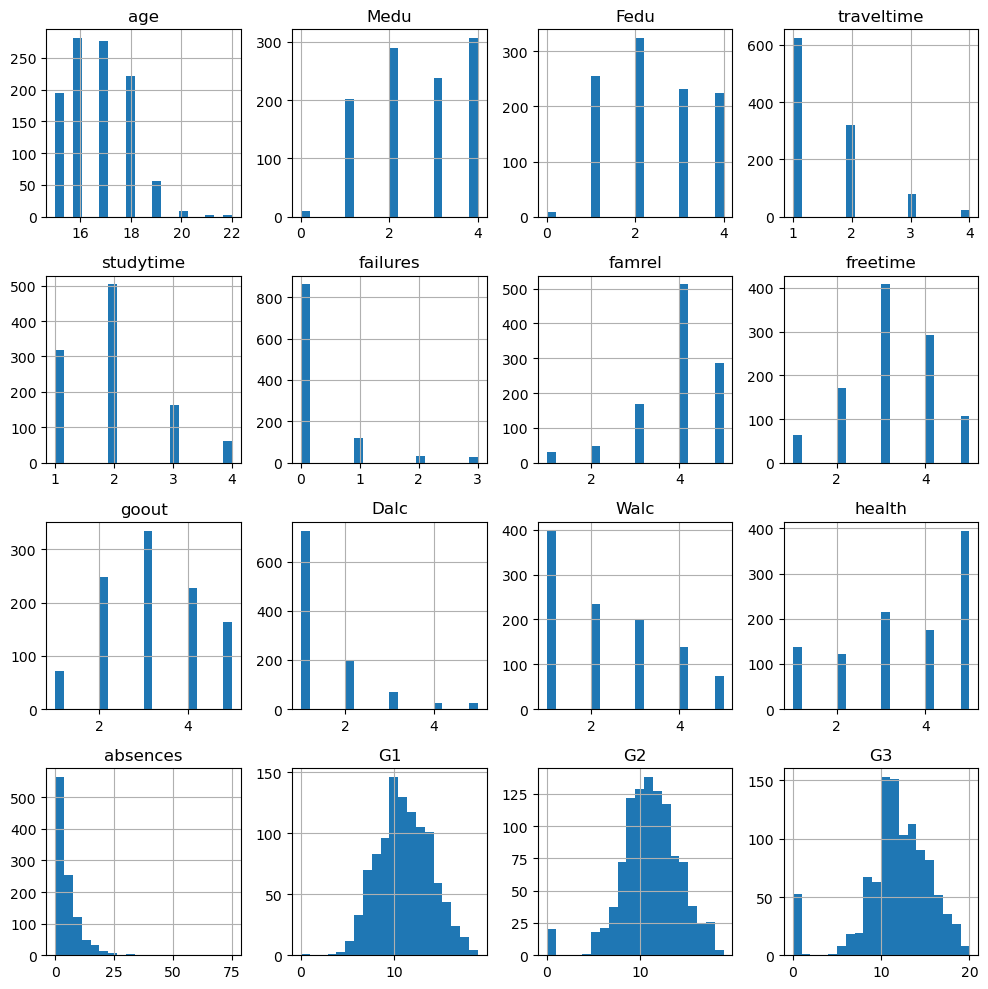

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
df.hist(bins=20, figsize=(10, 10))
plt.tight_layout()
plt.show()


In [39]:
df.describe(include="object").transpose()

,count,unique,top,freq
school,1044,2,GP,772
sex,1044,2,F,591
address,1044,2,U,759
famsize,1044,2,GT3,738
Pstatus,1044,2,T,923
Mjob,1044,5,other,399
Fjob,1044,5,other,584
reason,1044,4,course,430
guardian,1044,3,mother,728
schoolsup,1044,2,no,925


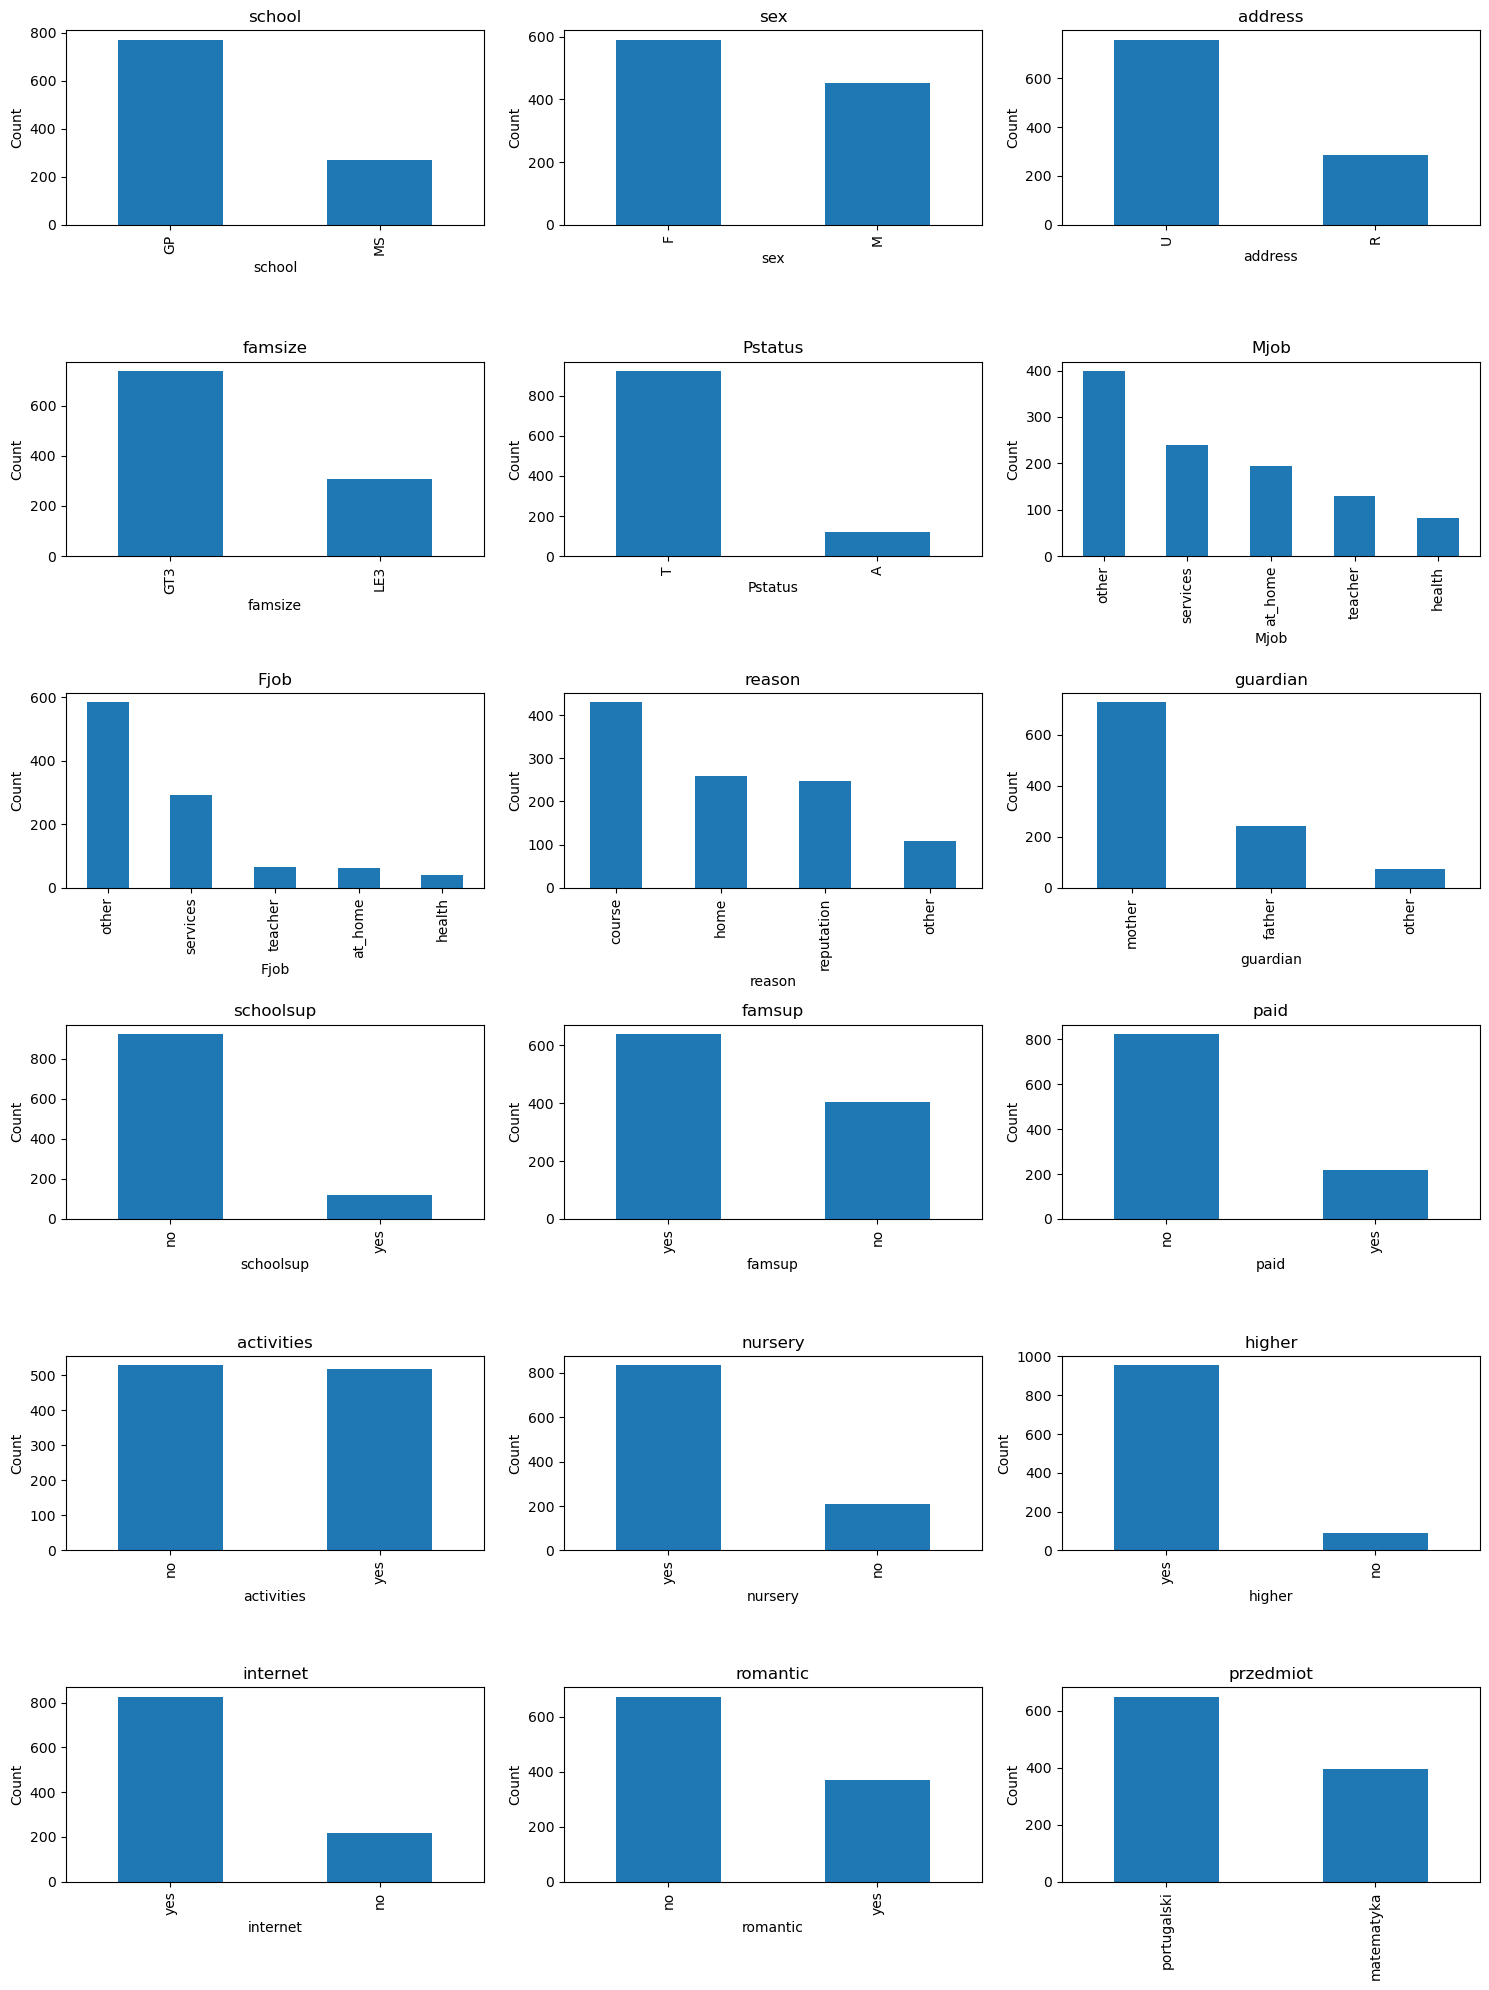

In [45]:
object_columns = df.select_dtypes(include='object').columns
# Tworzenie siatki wykresów
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))  # 6 wierszy, 3 kolumny
axes = axes.flatten()

# Iteracja przez kolumny typu object
for i, column in enumerate(object_columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i], title=column)
    axes[i].set_ylabel("Count")

# Ukrycie pustych osi, jeśli jest ich więcej niż kolumn
for j in range(len(object_columns), len(axes)):
    axes[j].axis('off')

plt.xlabel("")
plt.tight_layout()
plt.show()

In [59]:
import seaborn as sns

# Podstawowe statystyki
print("Podstawowe statystyki dla danych liczbowych:")
print(df.describe().transpose())

Podstawowe statystyki dla danych liczbowych:
             count       mean       std   min   25%   50%   75%   max
age         1044.0  16.726054  1.239975  15.0  16.0  17.0  18.0  22.0
Medu        1044.0   2.603448  1.124907   0.0   2.0   3.0   4.0   4.0
Fedu        1044.0   2.387931  1.099938   0.0   1.0   2.0   3.0   4.0
traveltime  1044.0   1.522989  0.731727   1.0   1.0   1.0   2.0   4.0
studytime   1044.0   1.970307  0.834353   1.0   1.0   2.0   2.0   4.0
failures    1044.0   0.264368  0.656142   0.0   0.0   0.0   0.0   3.0
famrel      1044.0   3.935824  0.933401   1.0   4.0   4.0   5.0   5.0
freetime    1044.0   3.201149  1.031507   1.0   3.0   3.0   4.0   5.0
goout       1044.0   3.156130  1.152575   1.0   2.0   3.0   4.0   5.0
Dalc        1044.0   1.494253  0.911714   1.0   1.0   1.0   2.0   5.0
Walc        1044.0   2.284483  1.285105   1.0   1.0   2.0   3.0   5.0
health      1044.0   3.543103  1.424703   1.0   3.0   4.0   5.0   5.0
absences    1044.0   4.434866  6.210017   0.0

In [60]:
print("\nPodstawowe statystyki dla danych kategorycznych:")
print(df.describe(include="object").transpose())

# Sprawdzenie brakujących wartości
print("\nBrakujące wartości w każdej kolumnie:")
print(df.isnull().sum())




Podstawowe statystyki dla danych kategorycznych:
           count unique          top freq
school      1044      2           GP  772
sex         1044      2            F  591
address     1044      2            U  759
famsize     1044      2          GT3  738
Pstatus     1044      2            T  923
Mjob        1044      5        other  399
Fjob        1044      5        other  584
reason      1044      4       course  430
guardian    1044      3       mother  728
schoolsup   1044      2           no  925
famsup      1044      2          yes  640
paid        1044      2           no  824
activities  1044      2           no  528
nursery     1044      2          yes  835
higher      1044      2          yes  955
internet    1044      2          yes  827
romantic    1044      2           no  673
przedmiot   1044      2  portugalski  649

Brakujące wartości w każdej kolumnie:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
F

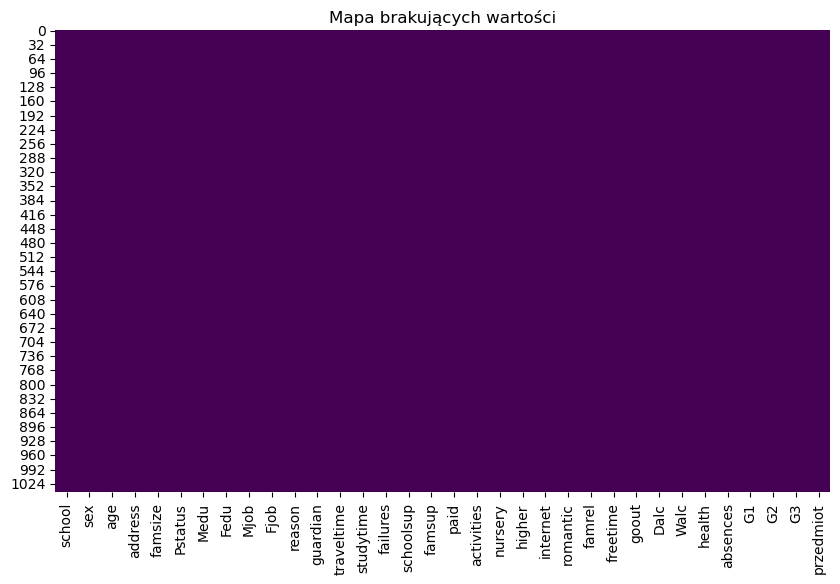

In [85]:
# Wizualizacja brakujących wartości
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa brakujących wartości")
plt.show()



In [84]:
df.loc[df.isna().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,przedmiot


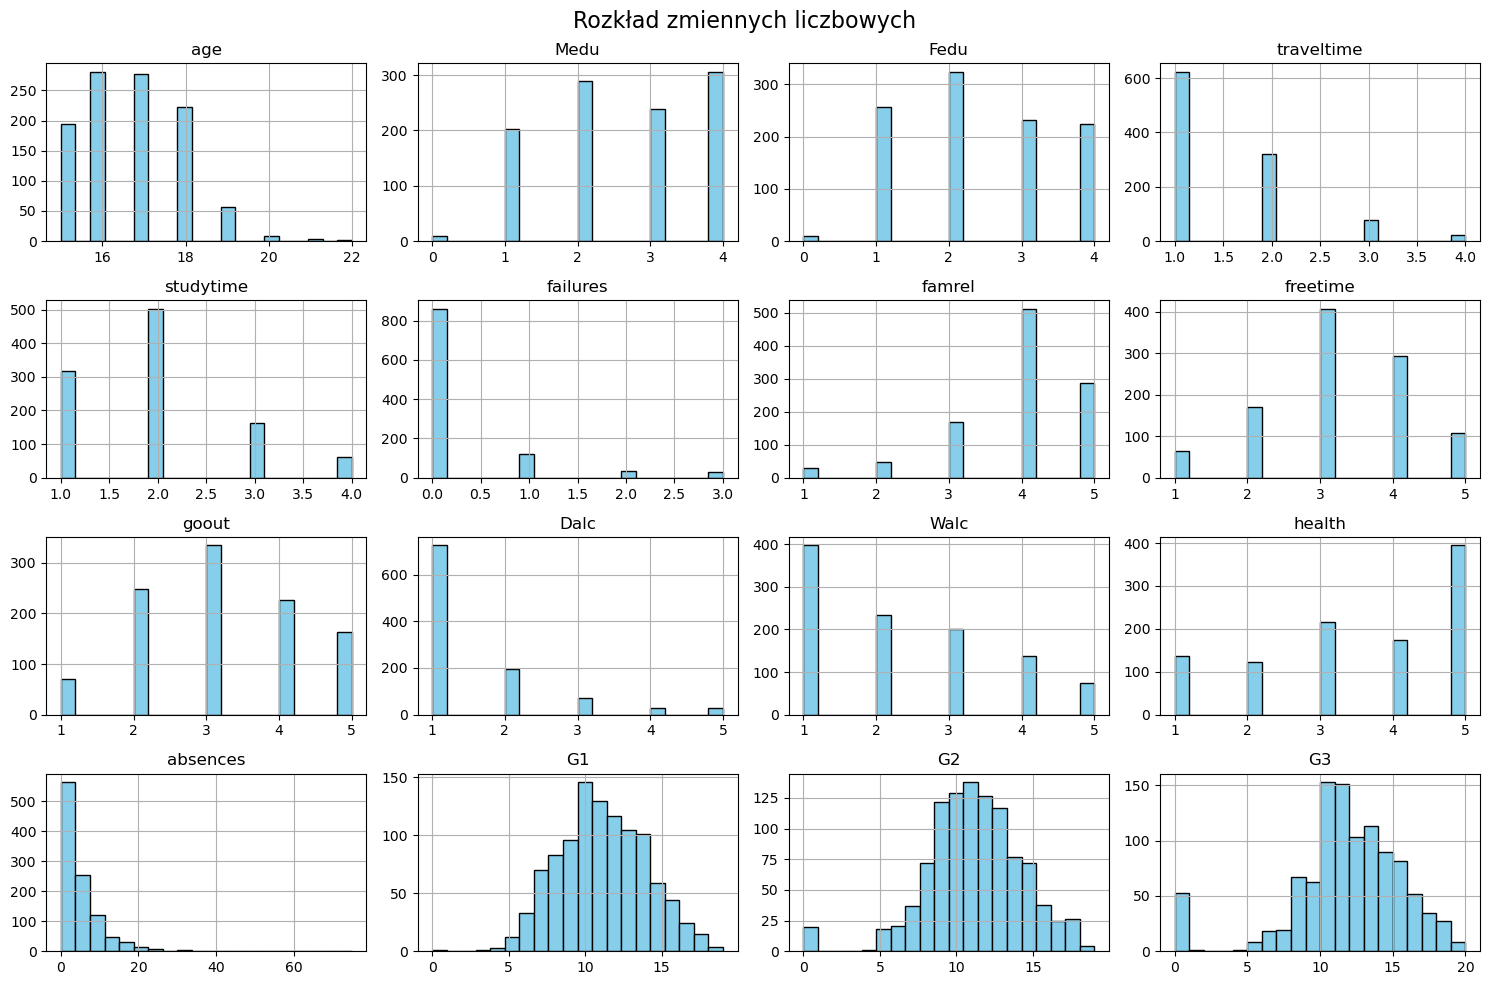

In [62]:
# Rozkład zmiennych liczbowych
df.select_dtypes(include=["int64", "float64"]).hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Rozkład zmiennych liczbowych", fontsize=16)
plt.tight_layout()
plt.show()



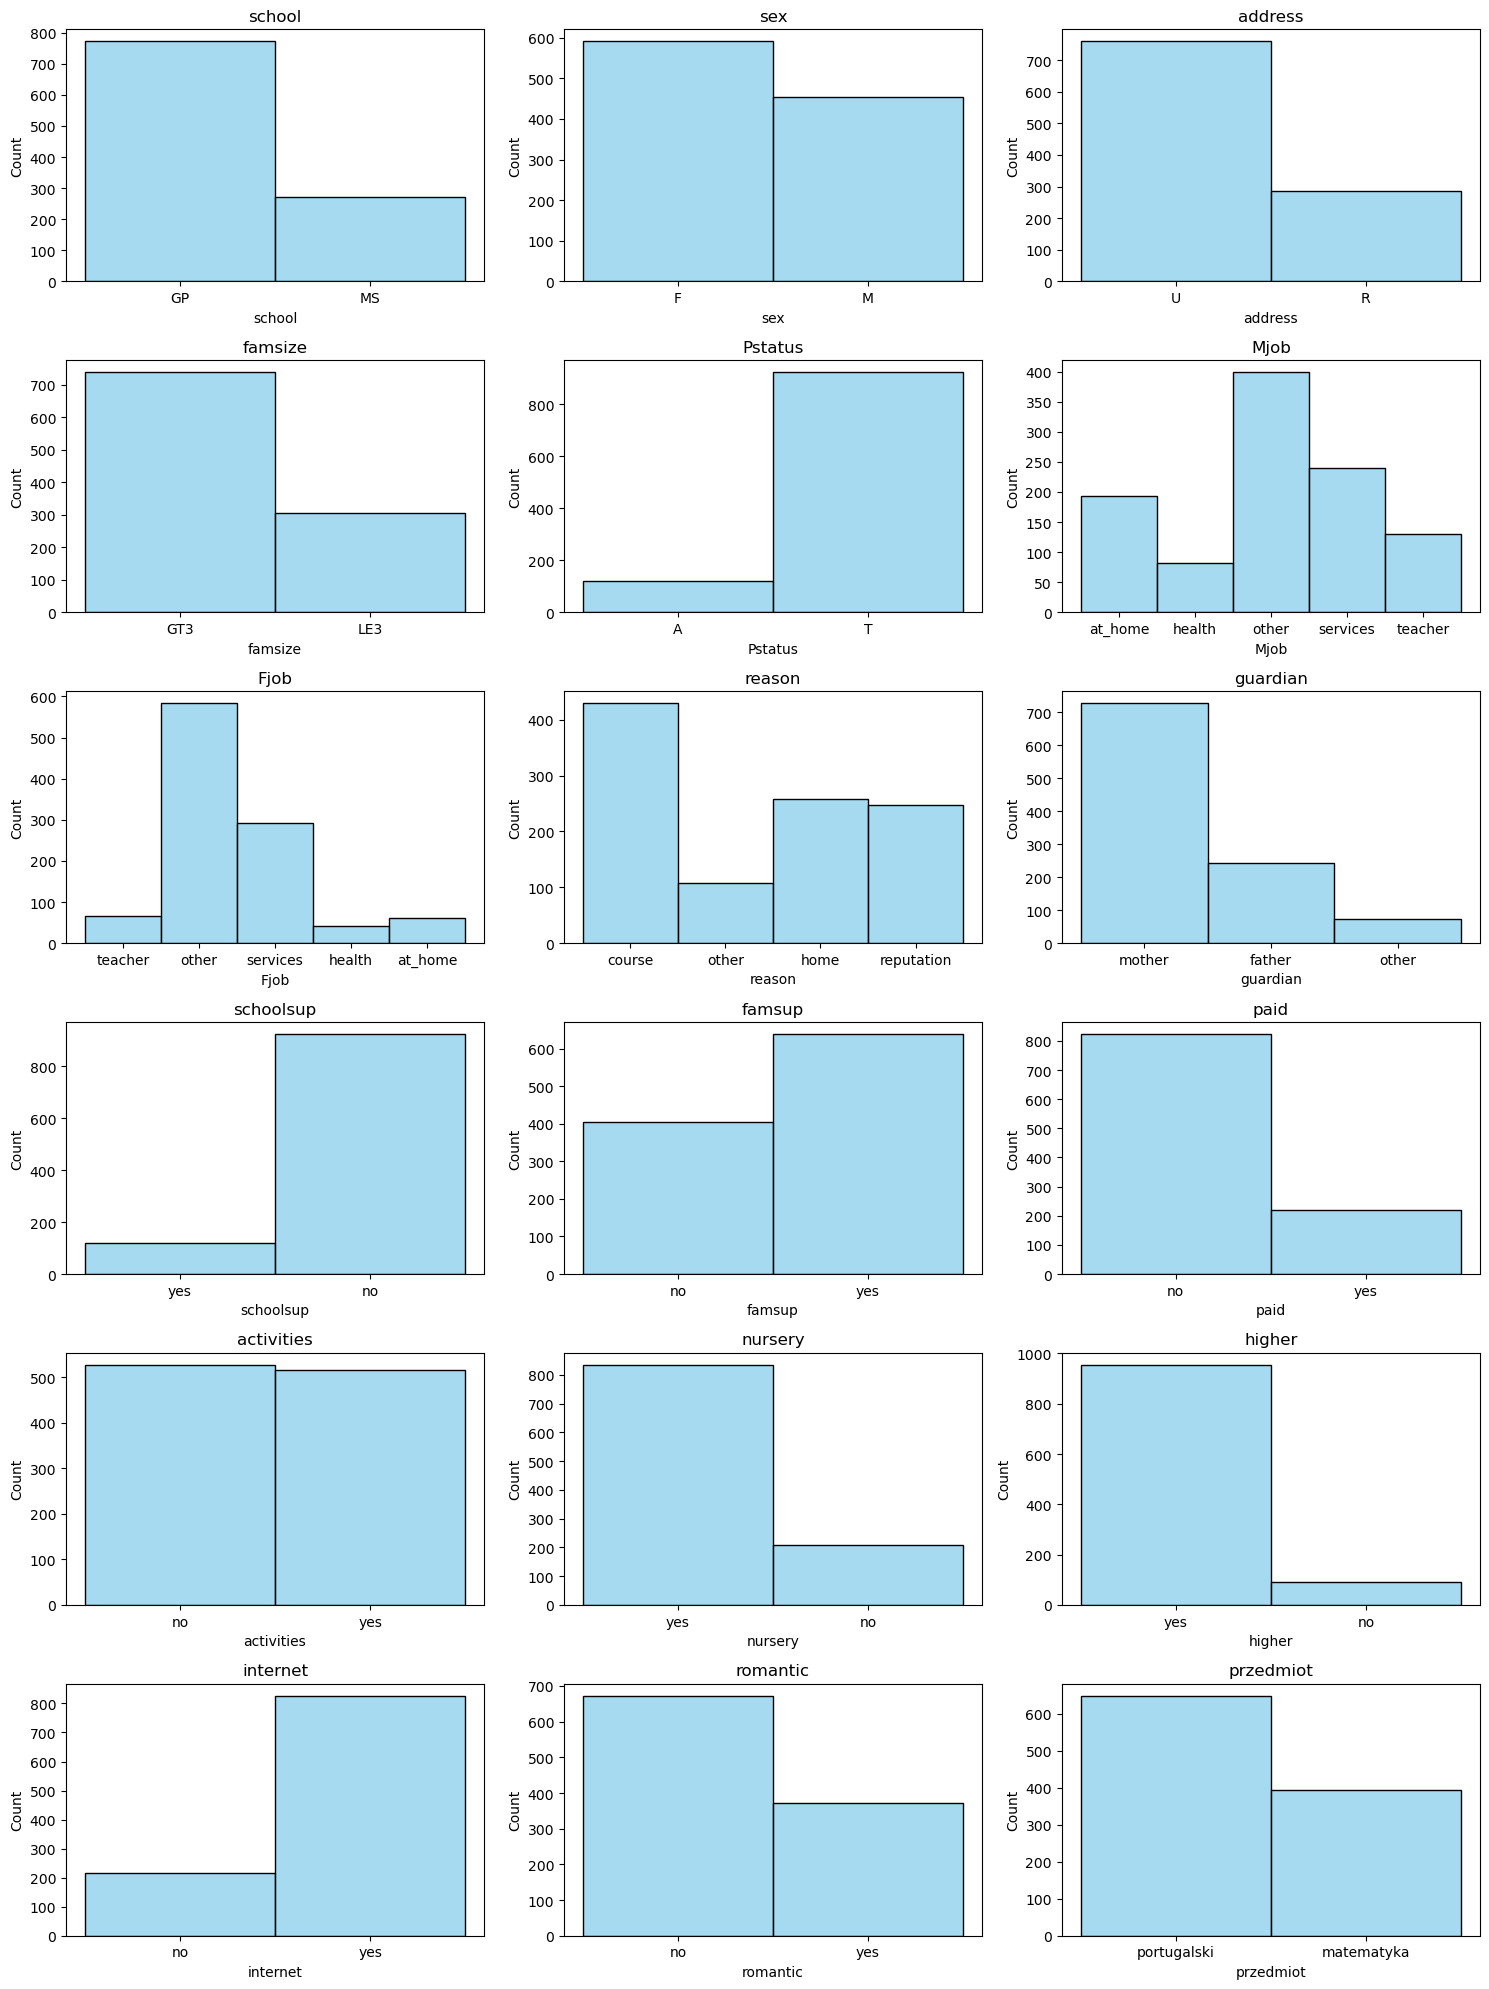

In [82]:
# Tworzenie siatki wykresów z użyciem seaborn
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))  # 6 wierszy, 3 kolumny
axes = axes.flatten()

# Iteracja przez kolumny typu object
for i, column in enumerate(object_columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=False, color="skyblue")
    axes[i].set_title(column)

# Ukrycie pustych osi, jeśli jest ich więcej niż kolumn
for j in range(len(object_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


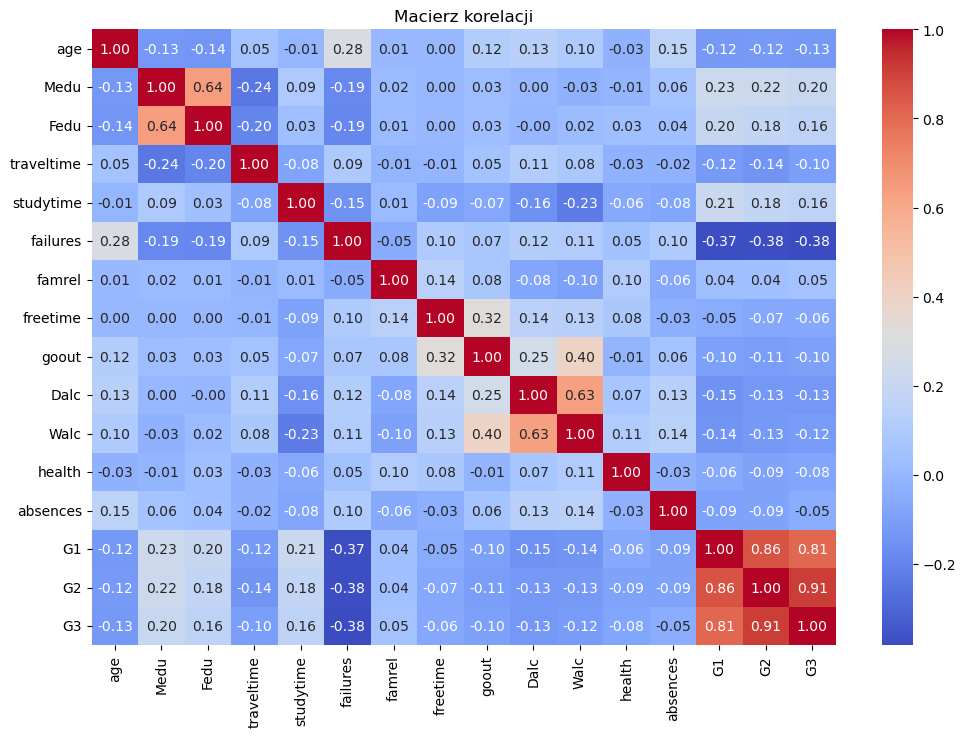

In [ ]:
# Korelacja między zmiennymi liczbowymi
# Wybieramy tylko kolumny liczbowe
numeric_df = df.select_dtypes(include=["number"])

# Obliczamy macierz korelacji
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Macierz korelacji")
plt.show()




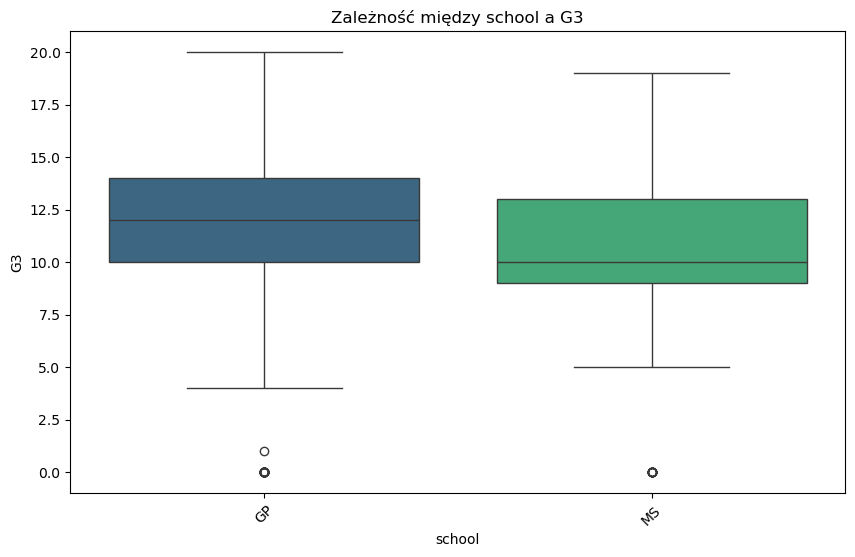

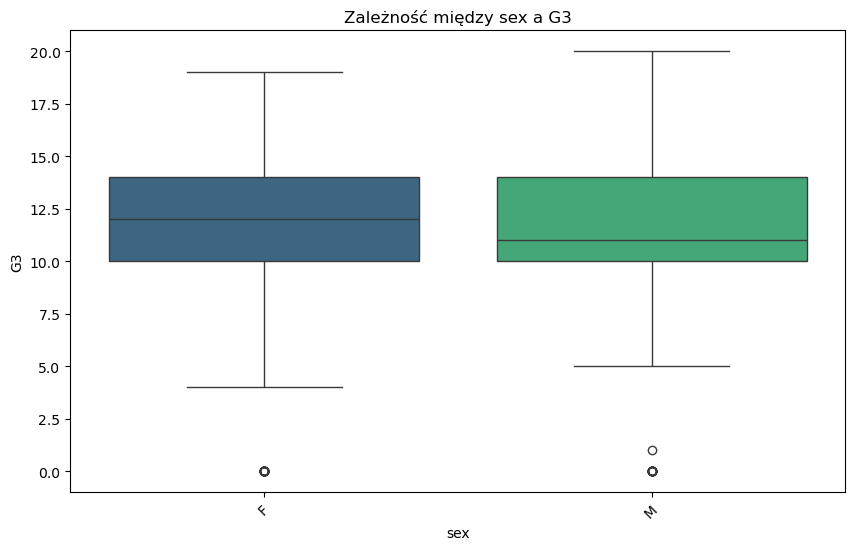

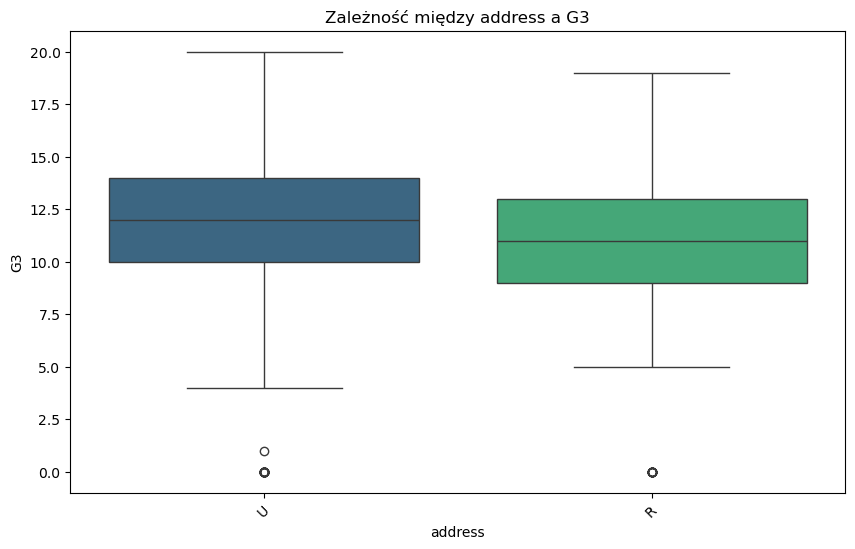

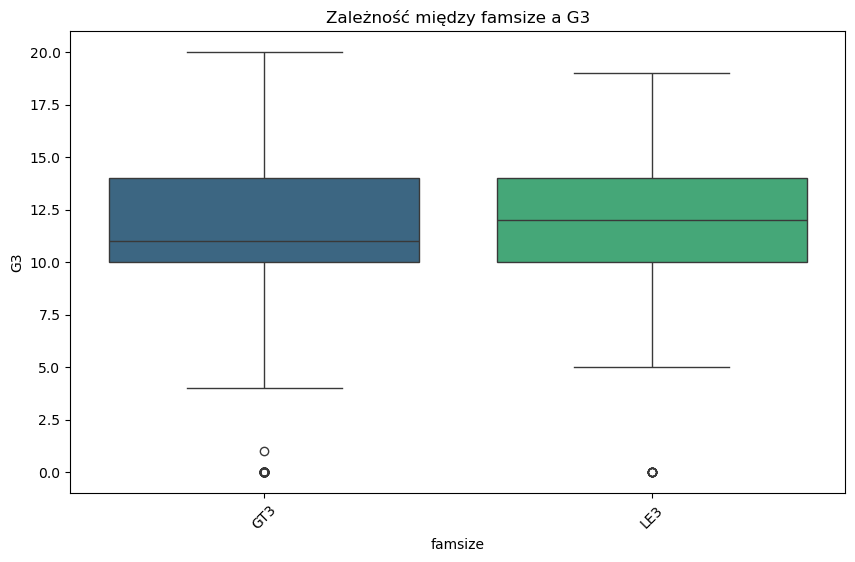

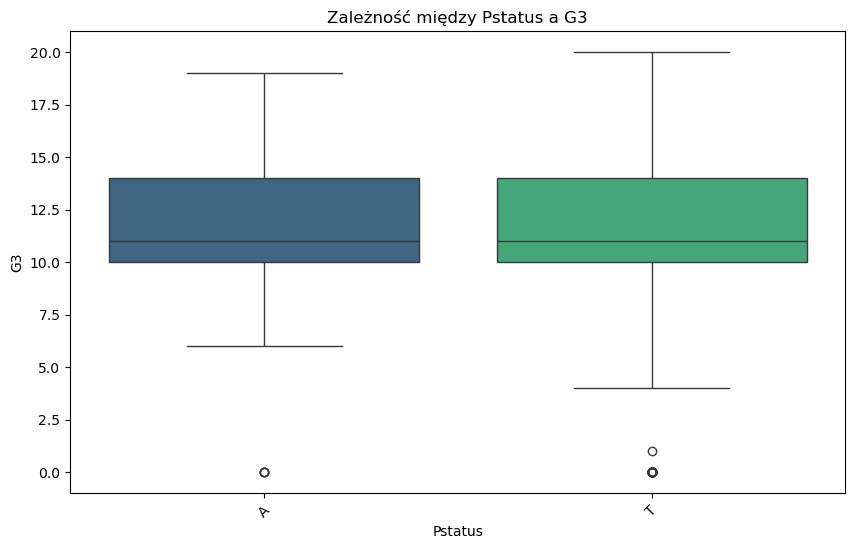

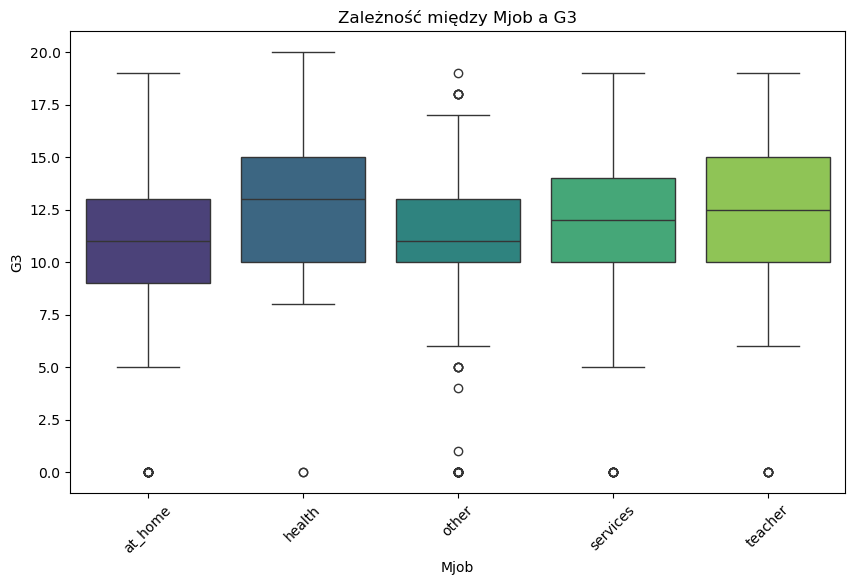

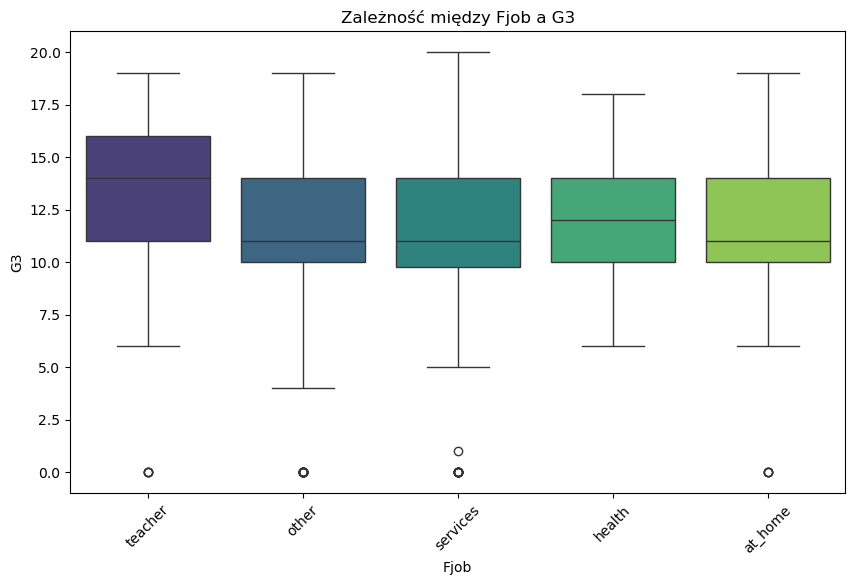

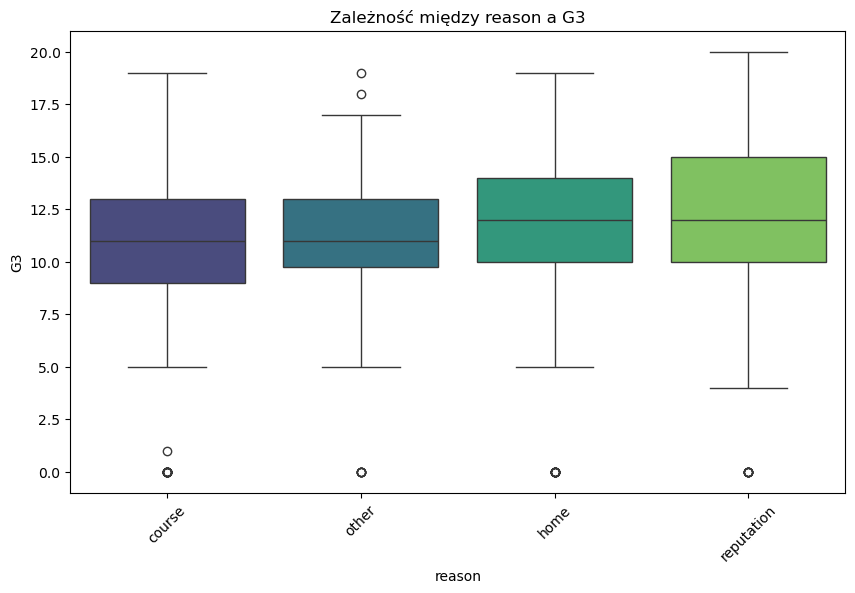

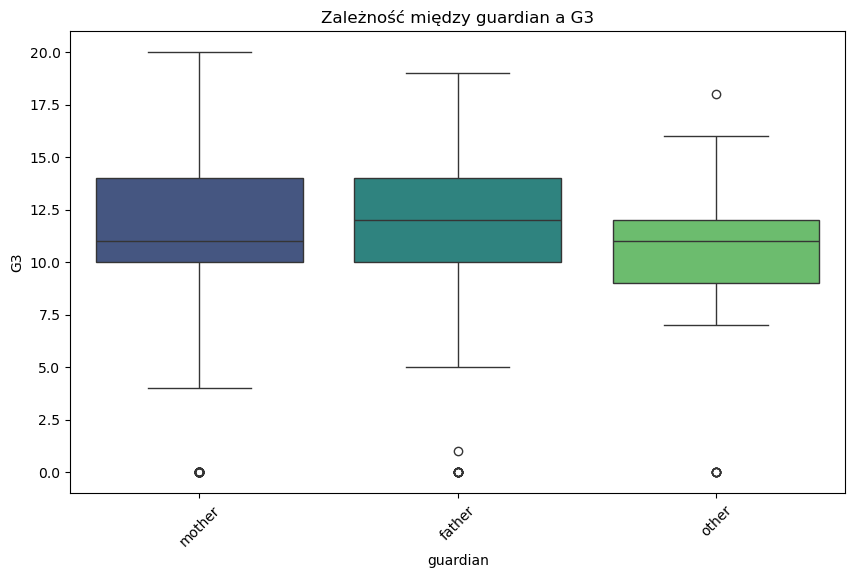

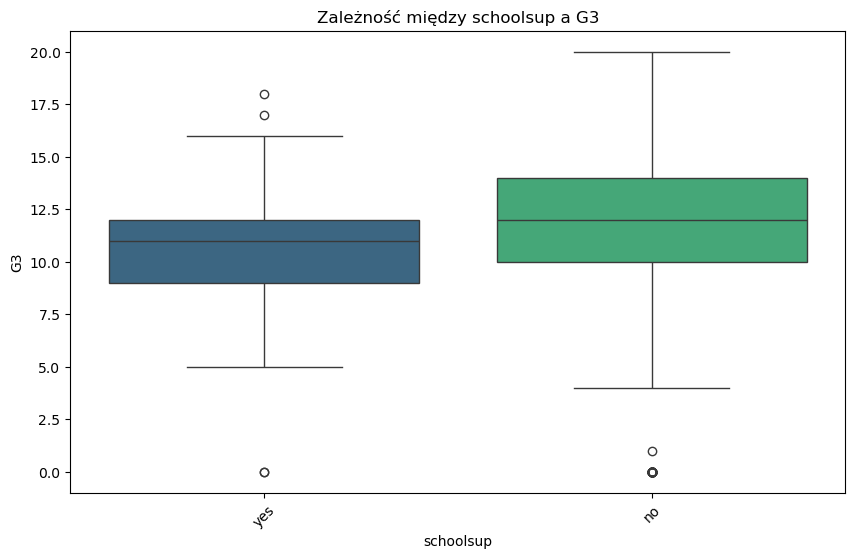

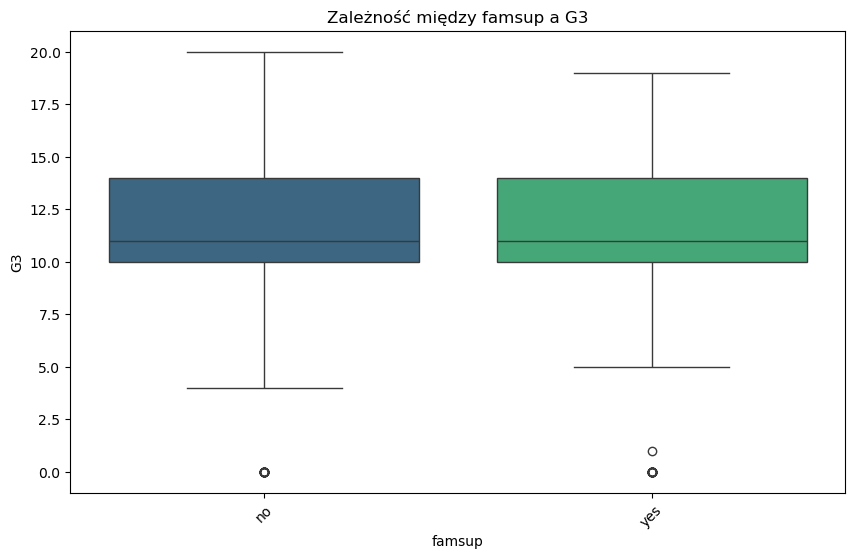

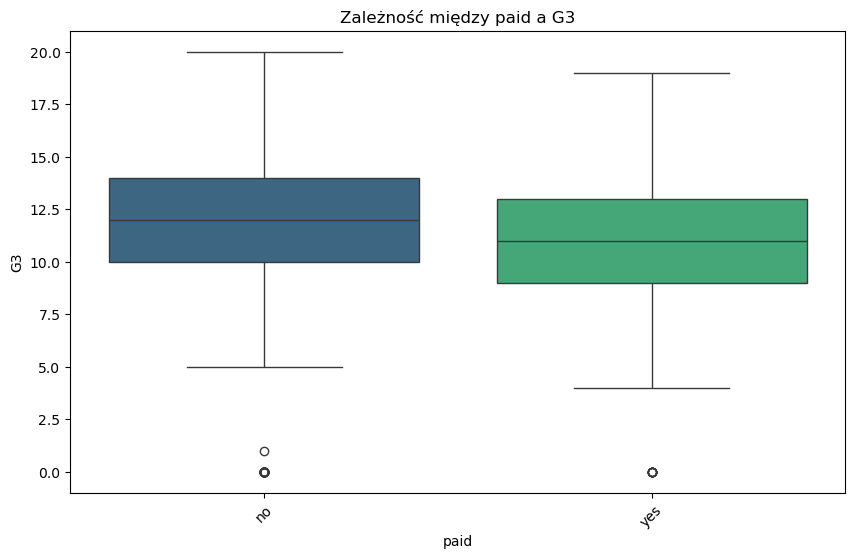

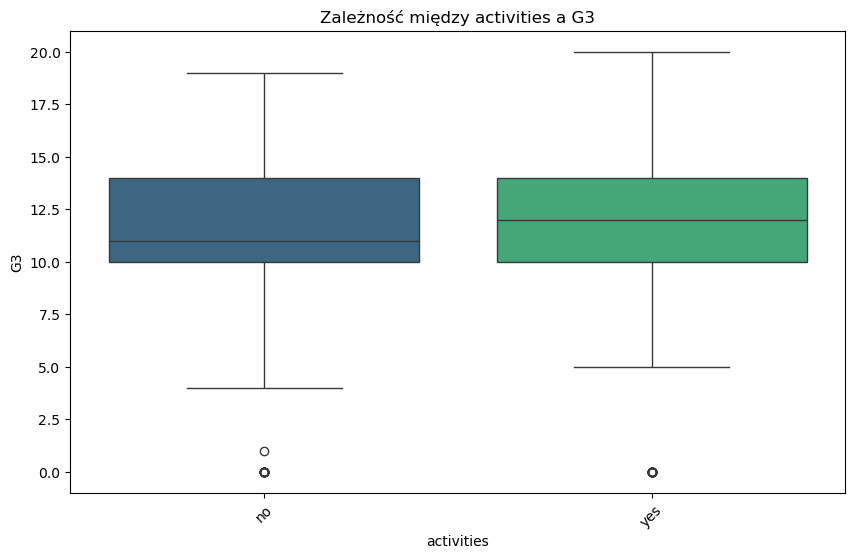

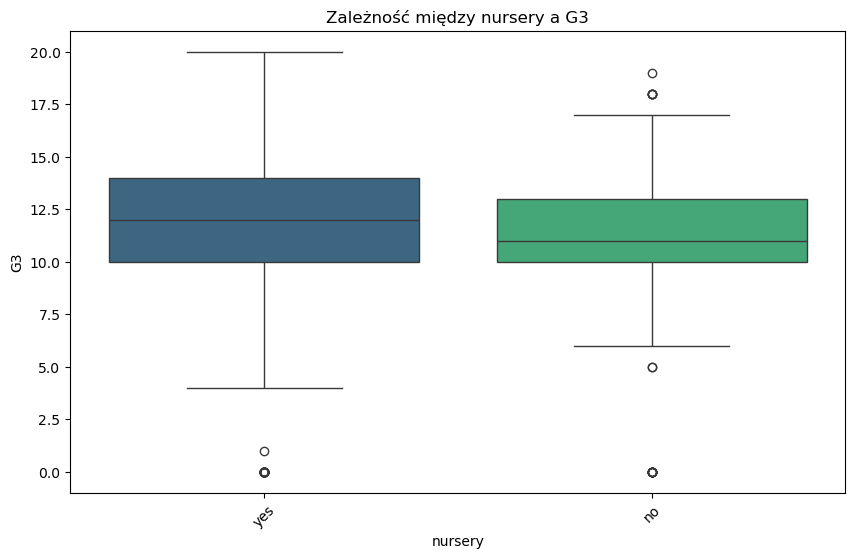

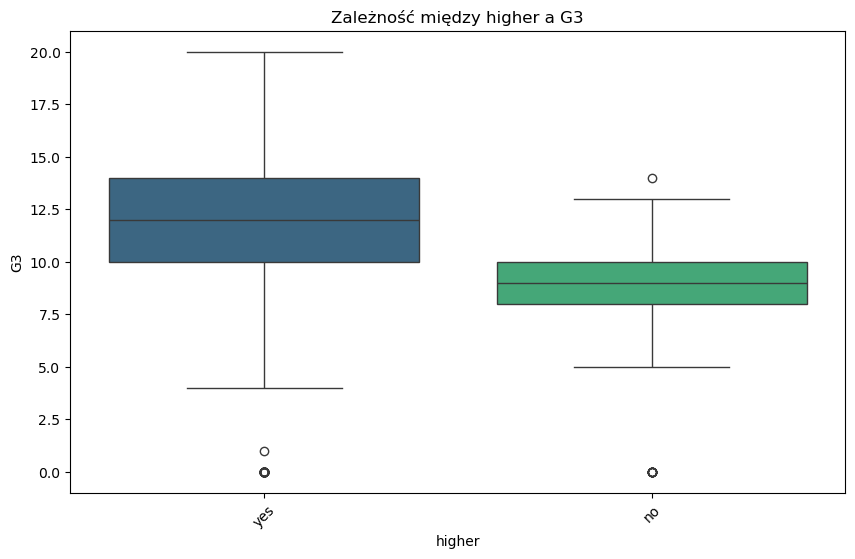

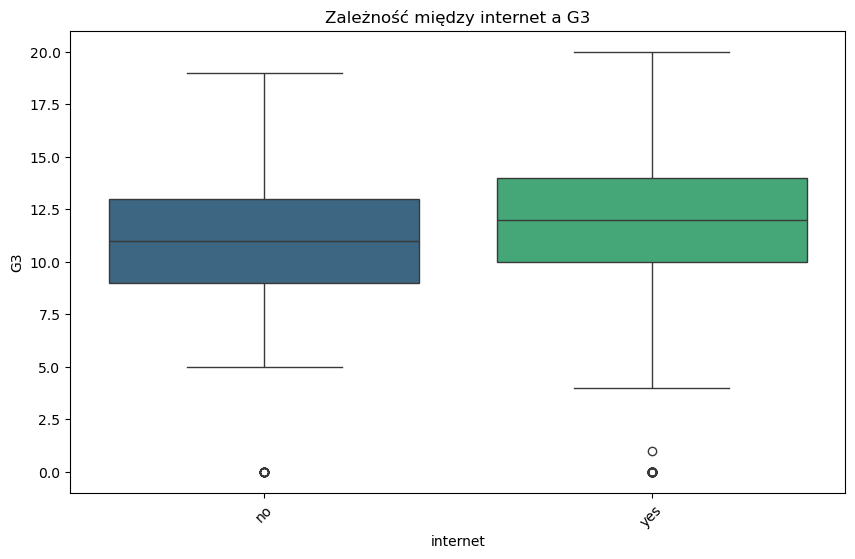

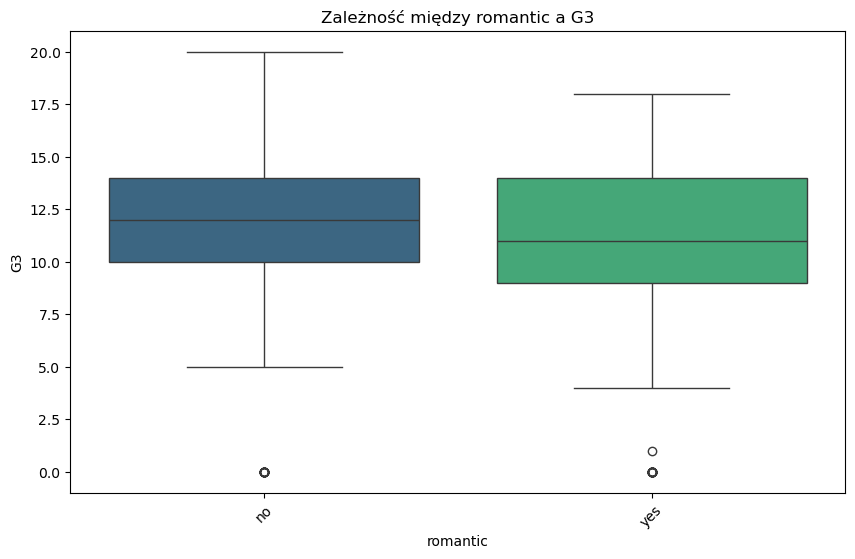

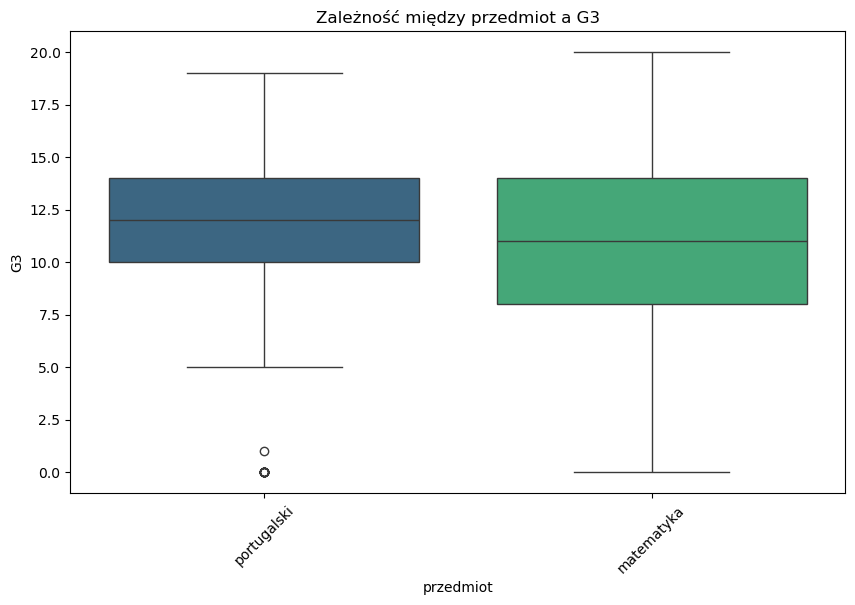

In [66]:
# Analiza zależności między zmiennymi kategorycznymi a liczbowymi
for column in object_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column, y="G3", hue=column, palette="viridis", dodge=False)
    plt.title(f"Zależność między {column} a G3")
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  # Remove legend if not needed
    plt.show()